In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
# data = pd.read_excel('Value_of_ECSP_Data_Dictionary.xlsx')
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [5]:
data.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [6]:
# 1. How many different companies are represented in the data set?
factory_cnt = data['Company Name'].nunique()
print("Number of companies:", factory_cnt)


# 2. What is the total number of jobs created for businesses in Queens?
jobs = data['Job created'].dropna()
print("Total number of jobs created:", sum(jobs))

# 3. How many different unique email domains names are there in the data set?
email = data['company email'].dropna()
domain = email.str.extract(r'@(.+)$')
print("Number of unique domain names: ", domain[0].nunique())

# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
nta = data['NTA'].value_counts().reset_index()
nta.columns = ['NTA', 'count']
nta = nta[nta['count']>=5] 
merged_df = pd.merge(data[['Total Savings', 'Job created', 'NTA']], nta, on='NTA', how='inner')
avg_total_savings = merged_df.groupby('NTA')['Total Savings'].mean().reset_index()
total_jobs_created = merged_df.groupby('NTA')['Job created'].sum().reset_index()
result = pd.merge(avg_total_savings, total_jobs_created, on='NTA')
result

# 5. Save your result for the previous question as a CSV file.
# result.to_csv('output.csv', index=False)

Number of companies: 439
Total number of jobs created: 149.0
Number of unique domain names:  356


,NTA,Total Savings,Job created
0,Battery Park City-Lower Manhattan,469890.796667,0.0
1,Bushwick South,26140.455000,10.0
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
3,College Point,17159.372857,2.0
4,Crown Heights North,4036.298889,0.0
5,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
6,East New York,48433.093333,15.0
7,East Williamsburg,13990.626364,0.0
8,Greenpoint,9753.649286,0.0
9,Hunters Point-Sunnyside-West Maspeth,23931.398933,0.0


C:\Users\nina\AppData\Local\Temp\ipykernel_23336\594601447.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[1].scatter('Job created', 'Total Savings',  data=result, cmap='RdBu_r')


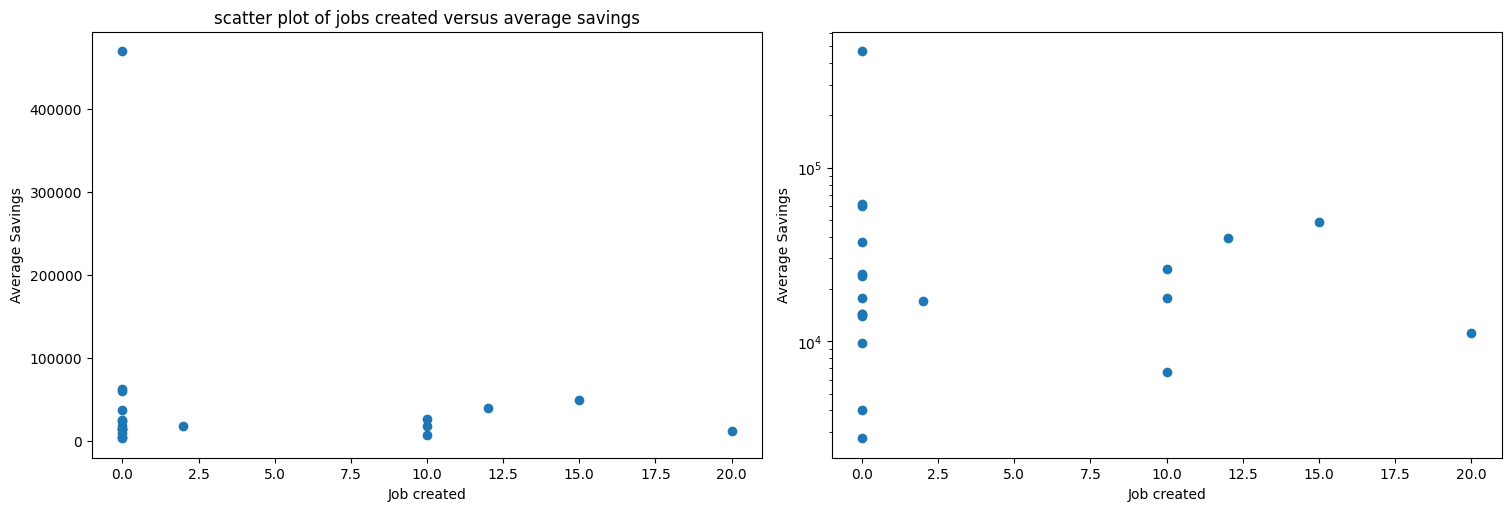

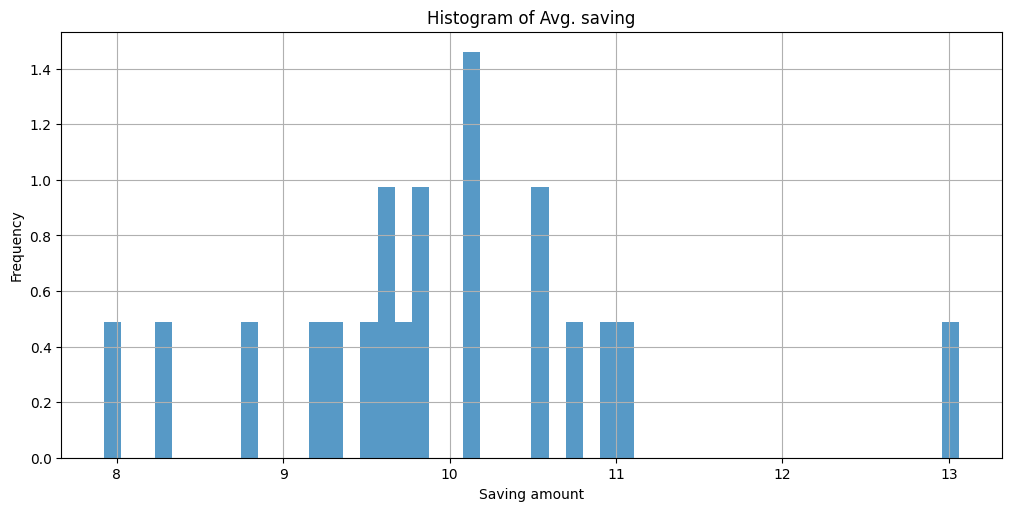

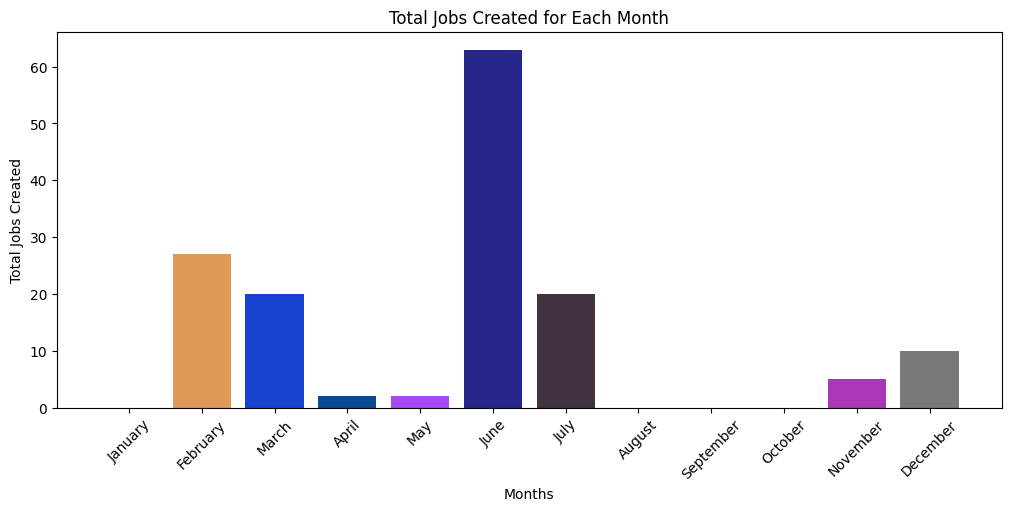

In [7]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? (day 4)
nta = data['NTA'].value_counts().reset_index()
nta.columns = ['NTA', 'count']
nta = nta[nta['count']>=5] 
merged_df = pd.merge(data[['Total Savings', 'Job created', 'NTA']], nta, on='NTA', how='inner')
avg_total_savings = merged_df.groupby('NTA')['Total Savings'].mean().reset_index()
total_jobs_created = merged_df.groupby('NTA')['Job created'].sum().reset_index()
result = pd.merge(avg_total_savings, total_jobs_created, on='NTA')
result

# create a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
fig, axs = plt.subplots(1, 2, figsize=(15, 5), layout='constrained')
axs[0].scatter('Job created', 'Total Savings',  data=result)
axs[0].set_xlabel('Job created')
axs[0].set_ylabel('Average Savings')

axs[1].scatter('Job created', 'Total Savings',  data=result, cmap='RdBu_r')
axs[1].set_xlabel('Job created')
axs[1].set_ylabel('Average Savings')
axs[1].set_yscale('log')

axs[0].set_title('scatter plot of jobs created versus average savings')

# histogram of the log of the average total savings.
fig, ax = plt.subplots(figsize=(10,5), layout='constrained')
n, bins, patches = ax.hist(np.log(result['Total Savings']), 50, density=True, facecolor='C0', alpha=0.75)
ax.set_xlabel('Saving amount')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Avg. saving')
ax.grid(True)

# line plot of the total jobs created for each month.
data['month'] = pd.to_datetime(data['Effective Date']).dt.month
jobs_created_per_month = data.groupby('month')['Job created'].sum().reset_index() 

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bar_colors = [random.choice(['#'+format(random.randint(0, 256**3-1), '06x') for _ in range(3)]) for _ in range(len(months))]

fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
x = np.arange(1,len(months)+1)

ax1.bar(x, jobs_created_per_month['Job created'], color = bar_colors)
ax1.set_xticks(x)
ax1.set_xticklabels(months, rotation=45)

ax1.set_xlabel('Months')
ax1.set_ylabel('Total Jobs Created')
ax1.set_title('Total Jobs Created for Each Month')

plt.show()